In [1]:
# loading the library
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import sklearn
from sklearn import tree
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [2]:
data=pd.read_csv('bankloan.csv')
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.36,5.01,1
1,27,1,10,6,31,17.3,1.36,4.00,0
2,40,1,15,14,55,5.5,0.86,2.17,0
3,41,1,15,14,120,2.9,2.66,0.82,0
4,24,2,2,0,28,17.3,1.79,3.06,1


In [3]:
data.shape

(700, 9)

In [4]:
data.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [5]:
# import graphiz

In [6]:
# pip install graphiz

In [7]:
data=pd.DataFrame(data)

## exploring the data 

In [8]:
data.shape

(700, 9)

In [9]:
data.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [10]:
good_predictor=data.iloc[:,[0,4,6,7,8]]    # selecting only the good predictors
good_predictor.head()

,age,income,creddebt,othdebt,default
0,41,176,11.36,5.01,1
1,27,31,1.36,4.00,0
2,40,55,0.86,2.17,0
3,41,120,2.66,0.82,0
4,24,28,1.79,3.06,1


In [39]:
good_predictor.shape

(700, 5)

In [12]:
good_predictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   income    700 non-null    int64  
 2   creddebt  700 non-null    float64
 3   othdebt   700 non-null    float64
 4   default   700 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 27.5 KB


In [13]:
good_predictor.columns

Index(['age', 'income', 'creddebt', 'othdebt', 'default'], dtype='object')

In [14]:
good_predictor.default.value_counts()

0    517
1    183
Name: default, dtype: int64

In [15]:
# their is a imbalance in the class variable so we are performing the upsampling and balancing the data

## predictor

In [16]:
# seperating the predictors and target variable

x=good_predictor.iloc[:,[0,1,2,3]]     # only predictors
y=good_predictor.iloc[:,4]   #  only target variable

In [17]:
x.head(2)

,age,income,creddebt,othdebt
0,41,176,11.36,5.01
1,27,31,1.36,4.00


In [18]:
y.head(4)

0    1
1    0
2    0
3    0
Name: default, dtype: int64

In [19]:
# train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=0)

In [20]:
print('x_train =',len(x_train))
print('x_test =',len(x_test))
print('y_train =',len(y_train))
print('y_test =',len(y_test))

x_train = 420
x_test = 280
y_train = 420
y_test = 280


In [21]:
y_train.value_counts()

0    311
1    109
Name: default, dtype: int64

In [22]:
# will join the xtrain and ytrain   because we want to perform smote operation on only train data

train=x_train.join(y_train)
train.shape

(420, 5)

In [23]:
not_default=train[train.default==0]
print(len(not_default))
default=train[train.default==1]
print(len(default))

311
109


In [24]:
from sklearn.utils import resample
default_os=resample(default,replace=True,n_samples=len(not_default),random_state=27)

In [25]:
train_os=pd.concat([not_default,default_os])

In [26]:
x_trainos=train_os.loc[:,train_os.columns!='default']
y_trainos=train_os.loc[:,train_os.columns=='default']

In [27]:
x_trainos.shape

(622, 4)

In [28]:
y_trainos.value_counts()

default
0          311
1          311
dtype: int64

In [29]:
y_trainos.shape

(622, 1)

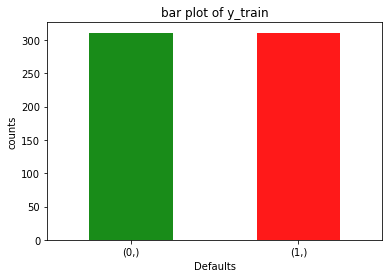

In [30]:
# train set
y_trainos.value_counts().plot(kind='bar',color=('g','r'),alpha=0.9)
plt.title('bar plot of y_train')
plt.xticks(rotation=360)
plt.xlabel('Defaults')
plt.ylabel('counts')
plt.show()

In [31]:
# test set

tst=y_test.value_counts()
tst

0    206
1     74
Name: default, dtype: int64

In [32]:
74/206

0.3592233009708738

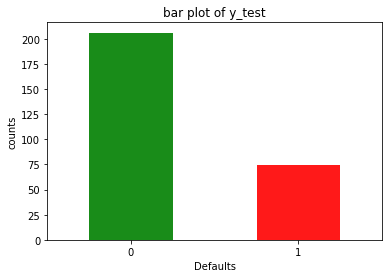

In [33]:
# Test set
y_test.value_counts().plot(kind='bar',color=['g','r'],alpha=0.9)
plt.title('bar plot of y_test')
plt.xticks(rotation=360)
plt.xlabel('Defaults')
plt.ylabel('counts')
plt.show()

In [34]:
# building the model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf=tree.DecisionTreeClassifier(max_depth=5)

clfFit=clf.fit(x_trainos,y_trainos)
clfFit


DecisionTreeClassifier(max_depth=5)

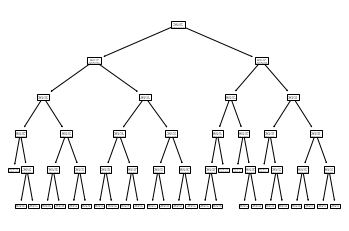

In [35]:
# plot Tree
tree.plot_tree(clfFit)
plt.show()

In [36]:
#pip install graphviz

In [42]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [43]:
# tree plot 
import graphviz

dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph.render('b1')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
# colored Tree
dot_data=tree.export_graphviz(clf,out_file=None,filled=True,rounded=True)

In [ ]:
graph=graphviz.Source(dot_data)
graph.render('b1_1')

In [ ]:
# prediction 
y_predict=clfFit.predict(x_test)

In [ ]:
# confusion matrix   (manual operation)
cm_tree=pd.crosstab(y_test,y_predict,rownames=['Actual'],colnames=['Predicted'],margins=True)

In [ ]:
# run the block
cm_tree

In [ ]:
# direct from sklearn
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_predict)

In [ ]:
# printing the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

In [ ]:
# ROC Curve
# roc curve prediction,fpr,tpr,auc

predictedProbability_tree=clfFit.predict_proba(x_test)[:,1]

In [ ]:
# mind:and;
from sklearn.metrics import roc_curve,auc,roc_auc_score

fpr,tpr,thresholds=metrics.roc_curve(y_test ,predictedProbability_tree)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
thresholds

In [ ]:
# ROC curve
# put fpr and tpr in a data frame

df=pd.DataFrame(dict(fpr=fpr,tpr=tpr))

In [ ]:
auc=auc(fpr,tpr)

In [ ]:
auc

In [ ]:
# Roc Curve
# run in black
plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area=%0.2f)'%auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()